In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
column_names = ['id', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'db', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

spotify_data = {}

for year in range(2010, 2020):
    file_name = f"{year}.csv"
    spotify_data[year] 
    = pd.read_csv(file_name, header=None, names=column_names)
    
all_top_songs = pd.concat(spotify_data.values(), ignore_index=True)

In [20]:
all_top_songs.shape

(613, 12)

# Cleaning the data

In [24]:
for col in columns_to_convert:
    all_top_songs[col] = pd.to_numeric(all_top_songs[col], errors='coerce')

    all_top_songs[col] = all_top_songs[col].fillna(0).astype(int)

print("\nData Types After Conversion:\n", all_top_songs.dtypes)


Data Types After Conversion:
 id            int32
title        object
artist       object
top genre    object
year          int32
bpm           int32
nrgy          int32
dnce          int32
db            int32
live          int32
val           int32
dur           int32
acous         int32
spch          int32
pop           int32
dtype: object


# What is the most popular song in the dataset?

In [28]:
max_pop_index = all_top_songs['pop'].idxmax()

most_popular_song = all_top_songs.loc[max_pop_index]

print(f"The most popular song is '{most_popular_song['title']}' by {most_popular_song['artist']}")

The most popular song is 'Memories' by Maroon 5


# What artist has the most songs in the dataset?

In [26]:
artist_song_count = all_top_songs['artist'].value_counts()

most_songs_artist = artist_song_count.idxmax()

print(f"Artist with the most songs: {most_songs_artist}")
print(f"Number of songs: {artist_song_count[most_songs_artist]}")

Artist with the most songs: Katy Perry
Number of songs: 17


# What is the most popular genre of music in the dataset?

In [29]:
genre_count = all_top_songs['top genre'].value_counts()

most_popular_genre = genre_count.idxmax()

print(f"The most popular genre is '{most_popular_genre}'")
print(f"Number of occurrences: {genre_count[most_popular_genre]}")

The most popular genre is 'dance pop'
Number of occurrences: 327


# Are there any songs in the dataset more than once?

In [32]:
duplicates = all_top_songs.duplicated(subset=['title', 'artist'], keep=False)

duplicate_songs = all_top_songs[duplicates]

number_of_duplicates = duplicates.sum()

if number_of_duplicates > 0:
    unique_duplicates = all_top_songs[duplicates].drop_duplicates(subset=['title', 'artist'])
    print(f"There are {number_of_duplicates} duplicate songs in the dataset, showing the first instance of each:")
    print(unique_duplicates[['title', 'artist']])
else:
    print("There are no duplicate songs in the dataset.")

There are 42 duplicate songs in the dataset, showing the first instance of each:
                                               title         artist
0                                              title         artist
5                               Just the Way You Are     Bruno Mars
12                                         Marry You     Bruno Mars
47          Written in the Stars (feat. Eric Turner)   Tinie Tempah
49           Castle Walls (feat. Christina Aguilera)           T.I.
116          We Are Never Ever Getting Back Together   Taylor Swift
182  A Little Party Never Killed Nobody (All We Got)         Fergie
276                                        The Hills     The Weeknd
277                                    Love Yourself  Justin Bieber
280                                            Sugar       Maroon 5
286                                         Stitches   Shawn Mendes
307                                          Company  Justin Bieber
316                            Runn

# Is there a relationship between popularity and danceability?

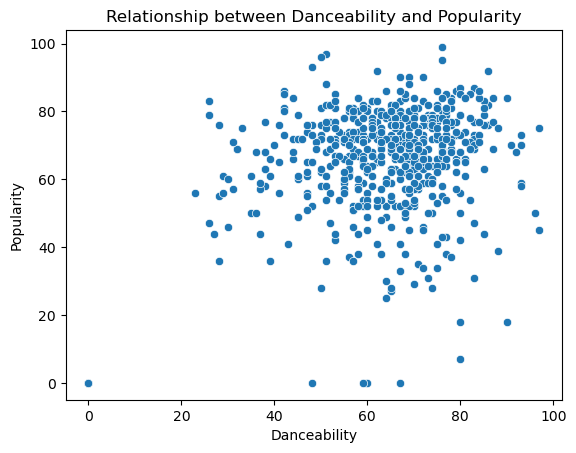

In [33]:
sns.scatterplot(x='dnce', y='pop', data=all_top_songs)
plt.title('Relationship between Danceability and Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

In [34]:
correlation = all_top_songs[['pop', 'dnce']].corr()
print("Correlation coefficient between popularity and danceability:", correlation.iloc[0, 1])

Correlation coefficient between popularity and danceability: 0.35009712930449116


# Does having a higher bpm lead to having a higher energy score?

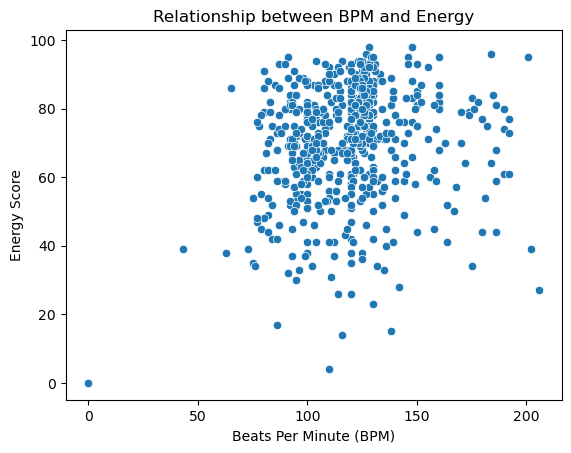

In [37]:
sns.scatterplot(x='bpm', y='nrgy', data=all_top_songs)
plt.title('Relationship between BPM and Energy')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Energy Score')
plt.show()

In [38]:
correlation = all_top_songs[['bpm', 'nrgy']].corr()
print("Correlation coefficient between BPM and Energy:", correlation.iloc[0, 1])

Correlation coefficient between BPM and Energy: 0.34642990425340414


# Which genre has the highest energy score?

In [39]:
average_energy_by_genre = all_top_songs.groupby('top genre')['nrgy'].mean()

highest_energy_genre = average_energy_by_genre.idxmax()
highest_energy_score = average_energy_by_genre.max()

print(f"The genre with the highest average energy score is '{highest_energy_genre}' with an average energy score of {highest_energy_score:.2f}")

The genre with the highest average energy score is 'french indie pop' with an average energy score of 89.00


# Extra Credit

# What percentage of songs may have been recorded live? (Consider anything above 50 in the live column to be recorded live)

In [40]:
live_recordings = all_top_songs['live'] > 50

number_of_live_recordings = live_recordings.sum()

total_songs = len(all_top_songs)

percentage_live = (number_of_live_recordings / total_songs) * 100

print(f"Percentage of songs that may have been recorded live: {percentage_live:.2f}%")

Percentage of songs that may have been recorded live: 2.94%


# What percentage of songs were acoustic? (Consider anything above 50 in the acoustic column to be acoustic)

In [41]:
acous_recordings = all_top_songs['acous'] > 50

number_of_acous_recordings = acous_recordings.sum()

total_songs = len(all_top_songs)

percentage_acous = (number_of_acous_recordings / total_songs) * 100

print(f"Percentage of songs that are aoustic: {percentage_acous:.2f}%")

Percentage of songs that are aoustic: 7.18%


# Which year’s songs have the highest amount of spoken word in the song?

In [42]:
average_speech_by_year = all_top_songs.groupby('year')['spch'].mean()

highest_speech_year = average_speech_by_year.idxmax()
highest_speech_score = average_speech_by_year.max()

print(f"The year with the highest amount of spoken word in songs is {highest_speech_year} with an average speechiness score of {highest_speech_score:.2f}")

The year with the highest amount of spoken word in songs is 2017 with an average speechiness score of 9.78
